TIF images → `Extract-Channels` → `Visualize-Inputs` → `Predict-Segments` → `Visualize-Segmentation` → predicted segmentations

From source image, extract the nuclear & membrane channels. Save each to npz.

Not sure how we'll configure channel extraction. Maybe should do that individually.

In [1]:
import numpy as np
import os
import smart_open

import tifffile

In [2]:
input_path = 'gs://davids-genomics-data-public/cellular-segmentation/10x-genomics/human-prostate-cancer-20210727-725mb/Visium_FFPE_Human_Prostate_IF_image.tif'
output_path = 'gs://davids-genomics-data-public/cellular-segmentation/10x-genomics/human-prostate-cancer-20210727-725mb/input_channels.npz'

In [3]:
with smart_open.open(input_path, 'rb') as input_file:
    # Input file specified here: https://www.10xgenomics.com/resources/datasets/human-prostate-cancer-adjacent-normal-section-with-if-staining-ffpe-1-standard-1-3-0
    
    tif = tifffile.TiffFile(input_file)
    
    # Channel 0 = 1:100 Iba1/AIF-1 (Cell Signalling, Cat. No. 36618S)
    # Don't need to load this channel– it's something else! We think!
    # channel_0 = tif.pages[0].asarray()

    # Channel 1 = 1:100 Vimentin (Cell Signalling, Cat. No. 9856S)
    channel_1 = tif.pages[1].asarray()

    # Channel 2 = 1:5000 DAPI (Thermo Scientific, Cat. No. 62248)
    channel_2 = tif.pages[2].asarray()

    # Select the membrane channel
    input_membrane = channel_1

    # Select the nuclear channel
    input_nuclear = channel_2
    
    tif.close()

In [4]:
# Stack the nuclear & membrane channels together.
input_channels = np.stack([input_nuclear, input_membrane], axis=-1)

In [5]:
# Write the resulting 3d array (rows, cols, 2 intensity channels) to output
with smart_open.open(output_path, 'wb') as output_file:
  np.savez_compressed(output_file, input_channels=input_channels)

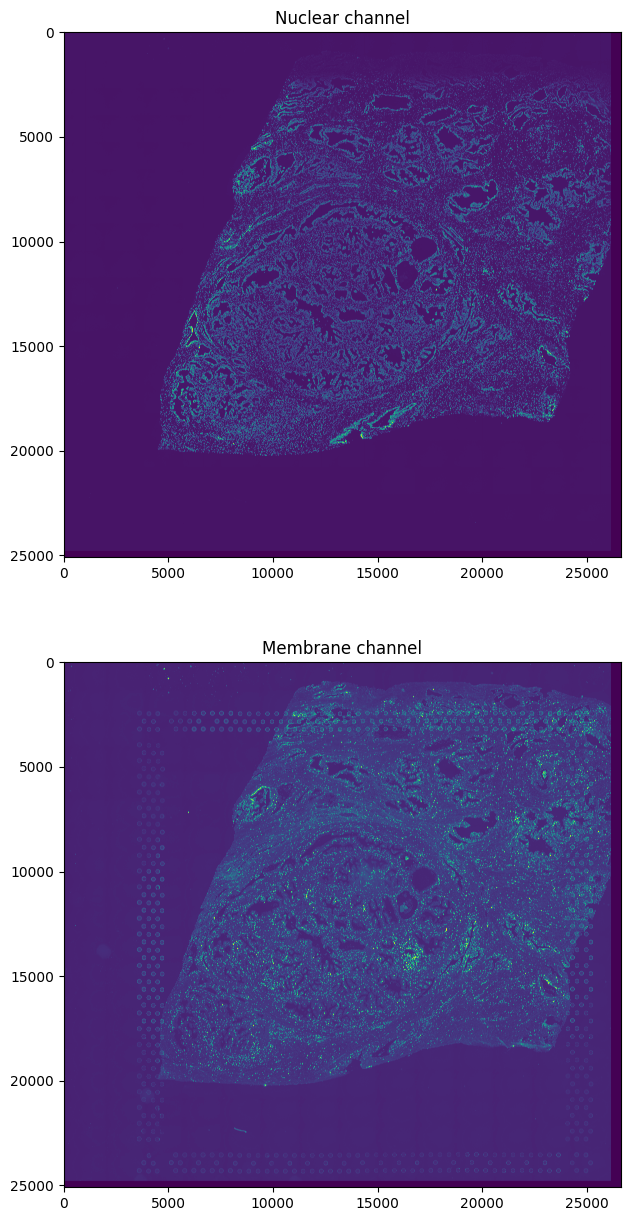

In [6]:
# Visualize nuclear/membrane channels
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax[0].imshow(input_channels[..., 0])
ax[1].imshow(input_channels[..., 1])
ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
plt.show()